In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [794]:
train = pd.read_csv('./data/train.csv')
train.drop('Unnamed: 0',axis=1,inplace=True)
test = pd.read_csv('./data/test.csv')

In [795]:
test

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,41,PR,17,F,1,1,2,0,2,...,40.0,500.0,E,E,D,A,B,A,NaN,A
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,35,SP,17,M,2,1,2,0,2,...,100.0,520.0,C,C,C,A,A,A,NaN,A
4573,655fa6306720ff16e825903b5422a46608a77545,35,SP,19,M,1,1,1,2,1,...,80.0,640.0,D,F,D,B,B,A,NaN,D
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,52,GO,17,M,2,2,3,0,1,...,80.0,520.0,C,E,C,A,A,A,NaN,A


In [796]:
train.shape

(13730, 166)

In [797]:
test.shape

(4576, 47)

In [139]:
extra_cols=set(train.columns) - set(test.columns)

In [798]:
train = train[test.columns].join(train['NU_NOTA_MT'])
train.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,...,520.0,D,D,C,A,A,C,H,A,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,...,580.0,A,A,B,A,A,A,NaN,A,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,...,NaN,D,D,C,A,A,A,NaN,A,NaN
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,...,NaN,H,E,E,C,B,C,F,D,NaN
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,...,NaN,E,D,C,A,A,B,F,A,NaN


In [799]:
train = train.set_index('NU_INSCRICAO')
test = test.set_index('NU_INSCRICAO')

In [461]:
train.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,NaN,...,520.0,D,D,C,A,A,C,H,A,399.4
2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,1.0,...,580.0,A,A,B,A,A,A,NaN,A,459.8
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,NaN,...,NaN,D,D,C,A,A,A,NaN,A,NaN
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,NaN,...,NaN,H,E,E,C,B,C,F,D,NaN
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,NaN,...,NaN,E,D,C,A,A,B,F,A,NaN


In [318]:
train.columns

Index(['CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'CO_PROVA_CN',
       'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q027', 'Q047', 'NU_NOTA_MT'],
      dtype='object')

In [319]:
train.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,...,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT
count,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,4282.000000,13730.000000,4282.000000,...,10133.000000,13730.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000
mean,30.736708,21.593809,2.185652,1.048871,1.782666,2.146176,1.353532,1.178888,0.129862,2.259692,...,516.472841,0.593664,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,482.497928
std,9.862405,7.043654,1.007285,0.258895,0.880734,3.217328,0.558472,0.565490,0.336163,0.698586,...,68.688190,0.491167,0.700100,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758,99.826323
min,11.000000,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,468.100000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000,408.900000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,520.900000,1.000000,1.000000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000,461.200000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,...,564.900000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000,537.600000
max,53.000000,67.000000,5.000000,4.000000,4.000000,10.000000,4.000000,3.000000,1.000000,4.000000,...,763.600000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,952.000000


In [173]:
train.isnull().sum()

CO_UF_RESIDENCIA       0
NU_IDADE               0
TP_SEXO                0
TP_COR_RACA            0
TP_NACIONALIDADE       0
TP_ST_CONCLUSAO        0
TP_ANO_CONCLUIU        0
TP_ESCOLA              0
IN_TREINEIRO           0
IN_BAIXA_VISAO         0
IN_CEGUEIRA            0
IN_SURDEZ              0
IN_DISLEXIA            0
IN_DISCALCULIA         0
IN_SABATISTA           0
IN_GESTANTE            0
IN_IDOSO               0
NU_NOTA_CN             0
NU_NOTA_CH             0
NU_NOTA_LC          3597
TP_LINGUA              0
Q001                   0
Q002                   0
Q006                   0
Q024                   0
Q025                   0
Q026                   0
Q027                7373
Q047                   0
NU_NOTA_MT             0
dtype: int64

In [131]:
#Quem n tem status_redacao, não tem competências nem nota
#train.loc[train['TP_STATUS_REDACAO'].isnull(),'TP_STATUS_REDACAO':]

,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
NU_INSCRICAO,,,,,,,,,,,,,,,,
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,NaN,A,NaN
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,F,D,NaN
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,F,A,NaN
94f7e277f87cd58e10a45da4ad5dd168651cf3ef,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,B,H,A,NaN
8570b9be0b2b629d00743d0de77cd95a84a46fbc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,B,B,C,F,A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bc6ea97fcc031786198e58ca5485d2648a2145fb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,B,B,B,B,A,NaN,A,NaN
e60cbd0026dae31e4f0580a909465c83355ea282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,D,B,B,B,I,A,NaN
99cfec493fefde4fcec60fd8c1e3eb1fe891fb31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,E,D,B,B,C,B,A,NaN


In [800]:
#Dropar por informação redundante: ['SG_UF_RESIDENCIA','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC']
#Dropar por ter muitos nulos e a maioria dos não nulos são uma informação específica, o que acaba não acrescentando em nada:['TP_ENSINO','TP_DEPENDENCIA_ADM_ESC']
#Dropar por excesso de nulos: '[TP_STATUS_REDACAO', 'NU_NOTA_COMP1','NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5','NU_NOTA_REDACAO']
#Dropar por informação inútil:['CO_PROVA_CN','CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT']
train.drop(['SG_UF_RESIDENCIA','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_ENSINO',
            'TP_DEPENDENCIA_ADM_ESC','TP_STATUS_REDACAO', 'NU_NOTA_COMP1','NU_NOTA_COMP2', 'NU_NOTA_COMP3',
            'NU_NOTA_COMP4', 'NU_NOTA_COMP5','NU_NOTA_REDACAO','CO_PROVA_CN','CO_PROVA_CH', 'CO_PROVA_LC',
            'CO_PROVA_MT'],axis=1,inplace=True)
test.drop(['SG_UF_RESIDENCIA','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_ENSINO',
            'TP_DEPENDENCIA_ADM_ESC','TP_STATUS_REDACAO', 'NU_NOTA_COMP1','NU_NOTA_COMP2', 'NU_NOTA_COMP3',
            'NU_NOTA_COMP4', 'NU_NOTA_COMP5','NU_NOTA_REDACAO','CO_PROVA_CN','CO_PROVA_CH', 'CO_PROVA_LC',
            'CO_PROVA_MT'],axis=1,inplace=True)

In [801]:
train.columns

Index(['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047',
       'NU_NOTA_MT'],
      dtype='object')

In [802]:
#Substituir os nulos de NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_CH e NU_NOTA_MT por 0 pq esses foram os eliminados e faltantes.
train[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC']]=train[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC']].fillna(value=0)
test[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC']]=test[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC']].fillna(value=0)

In [803]:
#Substituir os nulos de 'Q027'  por N pq esse são os que nunca exerceram atividade.
train['Q027']=train['Q027'].fillna(value='N')
test['Q027']=test['Q027'].fillna(value='N')

In [804]:
#Transformar em ordinais: Q001,Q002
#Os dois vão de A a H.
#Com A..G = [1,...,7] e H = 0
rep_dic = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':0,}
train[['Q001','Q002']] = train[['Q001','Q002']].replace(rep_dic)
test[['Q001','Q002']] = test[['Q001','Q002']].replace(rep_dic)

In [805]:
#Transforma em só uma coluna com soma de ( 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA','IN_DISCALCULIA') 
#e ('IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO')
train['ATEND_ESPE1'] = train[['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA','IN_DISCALCULIA']].sum(axis=1)
test['ATEND_ESPE1'] = test[['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA','IN_DISCALCULIA']].sum(axis=1)

train['ATEND_ESPE2'] = train[['IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO']].sum(axis=1)
test['ATEND_ESPE2'] = test[['IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO']].sum(axis=1)


train.drop(['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA','IN_DISCALCULIA','IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO'],axis=1,inplace=True)
test.drop(['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA','IN_DISCALCULIA','IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO'],axis=1,inplace=True)

In [807]:
#0 são nulos) de: ['TP_COR_RACA','TP_NACIONALIDADE']
rep_dic_0 = {1:'A',2:'B',3:'C',4:'D',5:'E',0:np.nan}
train[['TP_COR_RACA','TP_NACIONALIDADE']] = train[['TP_COR_RACA','TP_NACIONALIDADE']].replace(rep_dic_0)
test[['TP_COR_RACA','TP_NACIONALIDADE']] = test[['TP_COR_RACA','TP_NACIONALIDADE']].replace(rep_dic_0)

#Dropar os 1(que são nulos) de: ['TP_ESCOLA']
rep_dic_1 = {1:np.nan,2:'B',3:'C',4:'D'}
train['TP_ESCOLA'] = train['TP_ESCOLA'].replace(rep_dic_1)
test['TP_ESCOLA'] = test['TP_ESCOLA'].replace(rep_dic_1)

rep_dic_2 = {1:'A',2:'B',3:'C',4:'D'}
train['TP_ST_CONCLUSAO'] = train['TP_ST_CONCLUSAO'].replace(rep_dic_2)
test['TP_ST_CONCLUSAO'] = test['TP_ST_CONCLUSAO'].replace(rep_dic_2)

cats0 = ['TP_COR_RACA','TP_NACIONALIDADE','TP_ESCOLA','TP_ST_CONCLUSAO']

In [808]:
cats1 = ['Q026','Q027','Q047','TP_SEXO','Q025']
train[cats1].head()

,Q026,Q027,Q047,TP_SEXO,Q025
NU_INSCRICAO,,,,,
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,C,H,A,M,A
2c3acac4b33ec2b195d77e7c04a2d75727fad723,A,N,A,F,A
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,A,N,A,F,A
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,C,F,D,F,B
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,B,F,A,M,A


In [809]:
test.shape

(4576, 23)

In [810]:
cats = cats0 + cats1

In [811]:
cols = set(train.columns) - set(cats)

In [812]:
train[cols].isnull().sum()

Q002                0
TP_ANO_CONCLUIU     0
Q006                0
NU_NOTA_LC          0
TP_LINGUA           0
Q024                0
Q001                0
ATEND_ESPE1         0
CO_UF_RESIDENCIA    0
NU_NOTA_CH          0
NU_NOTA_CN          0
ATEND_ESPE2         0
NU_NOTA_MT          0
IN_TREINEIRO        0
NU_IDADE            0
dtype: int64

In [814]:
train = pd.concat([train[cols],
                     pd.get_dummies(train[cats[0]],prefix=cats[0]), 
                     pd.get_dummies(train[cats[1]],prefix=cats[1]),
                     pd.get_dummies(train[cats[2]],prefix=cats[2]),
                     pd.get_dummies(train[cats[3]],prefix=cats[3]),
                     pd.get_dummies(train[cats[4]],prefix=cats[4]),
                     pd.get_dummies(train[cats[5]],prefix=cats[5]),
                     pd.get_dummies(train[cats[6]],prefix=cats[6]),
                     pd.get_dummies(train[cats[7]],prefix=cats[7]),
                     pd.get_dummies(train[cats[8]],prefix=cats[8])],axis=1)

In [816]:
test = pd.concat([test[cols - set(['NU_NOTA_MT'])],
                     pd.get_dummies(test[cats[0]],prefix=cats[0]), 
                     pd.get_dummies(test[cats[1]],prefix=cats[1]),
                     pd.get_dummies(test[cats[2]],prefix=cats[2]),
                     pd.get_dummies(test[cats[3]],prefix=cats[3]),
                     pd.get_dummies(test[cats[4]],prefix=cats[4]),
                     pd.get_dummies(test[cats[5]],prefix=cats[5]),
                     pd.get_dummies(test[cats[6]],prefix=cats[6]),
                     pd.get_dummies(test[cats[7]],prefix=cats[7]),
                     pd.get_dummies(test[cats[8]],prefix=cats[8])],axis=1)

In [819]:
#train.to_csv('./data/train_preprocessed_0.csv')
#test.to_csv('./data/test_preprocessed_0.csv')

In [820]:
train = pd.read_csv('./data/train_preprocessed_0.csv')
train=train.set_index('NU_INSCRICAO')
test = pd.read_csv('./data/test_preprocessed_0.csv')
test=test.set_index('NU_INSCRICAO')

In [821]:
train.shape

(13730, 57)

In [822]:
test.shape

(4576, 55)

In [828]:
test['TP_ESCOLA_D'] = 0

In [829]:
ordinals = ['Q006','Q024']
train[ordinals]

,Q006,Q024
NU_INSCRICAO,,
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,C,A
2c3acac4b33ec2b195d77e7c04a2d75727fad723,B,A
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,C,A
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,E,C
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,C,A
...,...,...
aadf671ef8c1c6efa42e69432093ab83c17a52ac,G,B
461f7ef2753d9d5fa0b054930d6b0e0eec318e81,C,A
5354503700ecf2388f68990435390b6e1ad454ee,B,A


In [830]:
rep_dic_3 = dict(zip(list(string.ascii_uppercase)[:17],list(range(17))))
train[['Q006','Q024']] = train[['Q006','Q024']].replace(rep_dic_3)
test[['Q006','Q024']] = test[['Q006','Q024']].replace(rep_dic_3)

In [831]:
train[ordinals]

,Q006,Q024
NU_INSCRICAO,,
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2,0
2c3acac4b33ec2b195d77e7c04a2d75727fad723,1,0
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2,0
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,4,2
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2,0
...,...,...
aadf671ef8c1c6efa42e69432093ab83c17a52ac,6,1
461f7ef2753d9d5fa0b054930d6b0e0eec318e81,2,0
5354503700ecf2388f68990435390b6e1ad454ee,1,0


In [832]:
train

,Q002,TP_ANO_CONCLUIU,Q006,NU_NOTA_LC,TP_LINGUA,Q024,Q001,ATEND_ESPE1,CO_UF_RESIDENCIA,NU_NOTA_CH,...,Q027_N,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E,TP_SEXO_F,TP_SEXO_M,Q025_A,Q025_B
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,4,4,2,581.2,1,0,4,0,43,495.4,...,0,1,0,0,0,0,0,1,1,0
2c3acac4b33ec2b195d77e7c04a2d75727fad723,1,0,1,599.0,1,0,1,0,23,544.1,...,1,1,0,0,0,0,1,0,1,0
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,4,0,2,0.0,1,0,4,0,23,0.0,...,1,1,0,0,0,0,1,0,1,0
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,5,9,4,0.0,0,2,0,0,33,0.0,...,0,0,0,0,1,0,1,0,0,1
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,4,4,2,0.0,1,0,5,0,13,0.0,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aadf671ef8c1c6efa42e69432093ab83c17a52ac,5,3,6,394.5,0,1,5,0,35,419.7,...,0,1,0,0,0,0,0,1,0,1
461f7ef2753d9d5fa0b054930d6b0e0eec318e81,1,10,2,533.0,1,0,1,0,26,557.9,...,0,1,0,0,0,0,1,0,0,1
5354503700ecf2388f68990435390b6e1ad454ee,7,0,1,569.3,0,0,3,0,43,528.9,...,1,1,0,0,0,0,1,0,0,1


In [833]:
test

,Q002,TP_ANO_CONCLUIU,Q006,NU_NOTA_LC,TP_LINGUA,Q024,Q001,ATEND_ESPE1,CO_UF_RESIDENCIA,NU_NOTA_CH,...,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E,TP_SEXO_F,TP_SEXO_M,Q025_A,Q025_B,TP_ESCOLA_D
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
73ff9fcc02f0a99919906c942c2e1a1042cdcf98,1,5,2,431.8,0,0,2,0,41,443.5,...,1,0,0,0,0,1,0,1,0,0
71a95f9f1b91a82c65ad94abbdf9f54e6066f968,2,8,2,548.0,1,1,5,0,21,491.1,...,1,0,0,0,0,1,0,0,1,0
b38a03232f43b11c9d0788abaf060f7366053b6d,5,0,3,613.6,0,1,5,0,23,622.7,...,1,0,0,0,0,0,1,0,1,0
70b682d9a3636be23f6120fa9d6b164eb3c6002d,5,8,6,0.0,0,1,0,0,15,0.0,...,1,0,0,0,0,1,0,0,1,0
715494628a50142ce8cb17191cfe6d0f3cae0934,0,0,7,571.4,1,2,4,0,41,492.6,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,5,0,3,511.6,0,0,5,0,41,558.2,...,1,0,0,0,0,1,0,0,1,0
a75fa8770257e7c9368d059fe53d9ef431f4bdef,3,0,2,471.1,1,0,3,0,35,579.7,...,1,0,0,0,0,0,1,1,0,0
655fa6306720ff16e825903b5422a46608a77545,6,2,3,604.9,0,1,4,0,35,643.8,...,0,0,0,1,0,0,1,0,1,0


# ------------------------------------------------------------------------------------------------------------

In [834]:
#train.to_csv('./data/train_preprocessed.csv')
#test.to_csv('./data/test_preprocessed.csv')

In [47]:
train = pd.read_csv('./data/train_preprocessed.csv')
train = train.set_index('NU_INSCRICAO')
test = pd.read_csv('./data/test_preprocessed.csv')
test = test.set_index('NU_INSCRICAO')

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error,r2_score

In [49]:
X = train.drop('NU_NOTA_MT',axis=1)
y = train['NU_NOTA_MT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
scaler = StandardScaler()
model = RandomForestRegressor(n_estimators=100,random_state=42)
#model = AdaBoostRegressor(random_state=42)
pipe = Pipeline([('scaler',scaler),
                 ('model',model)])
pipe.fit(X_train,y_train)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=42,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [56]:
y_test_predict = pipe.predict(X_test)

# Ada
### obs: foi o primeiro submetido que obteu 92.46% no test submetido

In [8]:
np.sqrt(mean_squared_error(y_test,y_test_predict))

69.94874166119793

In [9]:
np.sqrt(mean_squared_log_error(y_test,y_test_predict))

0.22728149645099643

In [10]:
r2_score(y_test,y_test_predict)

0.908735527338921

# Random Forest
### obs: foi o segundo submetido que obteu 93.30% no test submetido

In [52]:
np.sqrt(mean_squared_error(y_test,y_test_predict))

62.51903409350621

In [53]:
np.sqrt(mean_squared_log_error(y_test,y_test_predict))

0.17897603906233073

In [54]:
r2_score(y_test,y_test_predict)

0.927093465427843

# Arquivo de submissão

In [25]:
y_test_predict = pipe.predict(test)

In [26]:
answer=pd.DataFrame(data=np.transpose([test.index,y_test_predict]),columns=['NU_INSCRICAO','NU_NOTA_MT'])
answer.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,436.835
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,465.578
2,b38a03232f43b11c9d0788abaf060f7366053b6d,609.464
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,549.618


In [27]:
answer.to_csv('./data/submissions/answer.csv',index=False)

In [28]:
test.shape

(4576, 56)

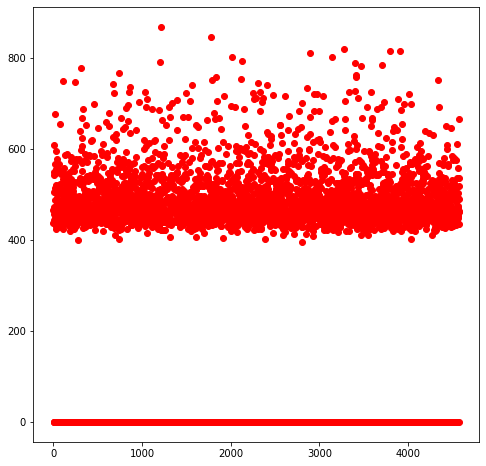

In [29]:
plt.figure(figsize=(8,8))
plt.plot(y_test_predict,'ro')

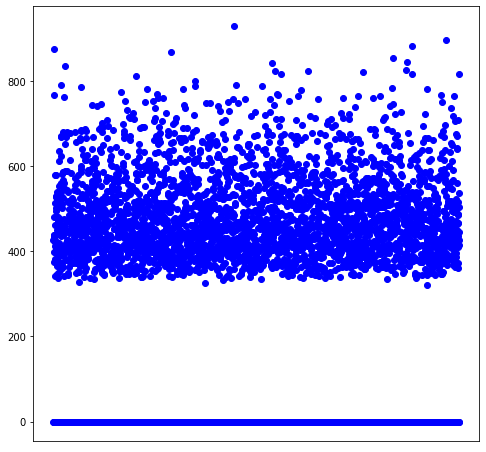

In [16]:
plt.figure(figsize=(8,8))
plt.xticks([])
plt.plot(y_test,'bo')